# Michiel's cycling data Notebook

## Opening a .fit file, reading it into a Pandas dataframe and show some graphs 


## Contents

0. Install fitparse and import the python librarie
1. Import the .fit file and read into a pandas dataframe
2. Check the data
3. Clean the data
4. Show data in graphs
5. Some more data analysis, such as burned calories, total duration etc.
6. Store the data as a .json file

In sports technology the .fit file is a standard originally developed by Garmin but now used as an open standard. 
You can find the .fit file of your activity on your device or download it from your online account. 

Upload this .fit file to a Jupyter Notebook. In step 1 we will use this file.

### To do
- [ ] pandas df with rounded numbers
- [ ] optimize storage of json file

## 0. Install fitparse and import the python libraries

We use the fitparse library to parse the .fit file.

Please find the github of fitparse project here: http://dtcooper.github.io/python-fitparse/

In [1]:
#!pip install fitparse 

In [8]:
#import the modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import fitparse

## 1. import and parse the .fit file and read it into a Pandas dataframe

Source: http://johannesjacob.com/

#### Instruction: Upload the .fit file to Jupyter and place it in the same folder as this notebook.

In [1]:
from fitparse import FitFile
import pandas as pd

fitfile = FitFile('39360149.fit') ### enter the name of the file here!

while True:
    try:
        fitfile.messages
        break
    except KeyError:
        continue
workout = []
for record in fitfile.get_messages('record'):
    r = {}
    for record_data in record:
        r[record_data.name] = record_data.value
    workout.append(r)

In [2]:
fietsdata = pd.DataFrame(workout) # read the workout into a pandas dataframe 
fietsdata.head() # print the first five rows of the dataframe

,accumulated_power,altitude,cadence,calories,distance,enhanced_altitude,enhanced_speed,grade,heart_rate,left_pedal_smoothness,left_right_balance,left_torque_effectiveness,position_lat,position_long,power,right_pedal_smoothness,right_torque_effectiveness,speed,temperature,timestamp
0,0.0,2505,63.0,0,0.0,1.0,6.564,None,123.0,None,None,None,624674633,58065712,200.0,None,None,6564,23,2020-05-31 06:23:06
1,29475.0,2505,63.0,0,12.0,1.0,6.281,None,123.0,None,None,None,624674832,58066766,195.0,None,None,6281,23,2020-05-31 06:23:07
2,29900.0,2500,62.0,0,12.0,0.0,5.730,None,123.0,None,None,None,624675071,58067740,230.0,None,None,5730,23,2020-05-31 06:23:08
3,30120.0,2500,63.0,0,24.0,0.0,6.163,None,123.0,None,None,None,624675409,58068694,220.0,None,None,6163,23,2020-05-31 06:23:09
4,30352.0,2500,63.0,0,24.0,0.0,5.931,None,123.0,None,None,None,624675965,58069609,232.0,None,None,5931,23,2020-05-31 06:23:10


## 2. Check the data

In [3]:
# see the datatypes
print(fietsdata.dtypes)

accumulated_power                    float64
altitude                               int64
cadence                              float64
calories                               int64
distance                             float64
enhanced_altitude                    float64
enhanced_speed                       float64
grade                                 object
heart_rate                           float64
left_pedal_smoothness                 object
left_right_balance                    object
left_torque_effectiveness             object
position_lat                           int64
position_long                          int64
power                                float64
right_pedal_smoothness                object
right_torque_effectiveness            object
speed                                  int64
temperature                            int64
timestamp                     datetime64[ns]
dtype: object


In [4]:
# do basic analysis of some of the data 
print(fietsdata[['power', 'heart_rate', 'enhanced_speed', 'cadence']].describe())

             power   heart_rate  enhanced_speed      cadence
count  8973.000000  8980.000000    12579.000000  8973.000000
mean    276.732865   147.126392        6.584683    73.575281
std      88.895600    13.695467        1.386035    14.669400
min       0.000000    58.000000        0.000000     0.000000
25%     252.000000   143.000000        6.235000    71.000000
50%     278.000000   150.000000        6.811000    76.000000
75%     307.000000   155.000000        7.310000    80.000000
max    2494.000000   175.000000       13.895000   201.000000


## 3.Data cleaning

### 3a. Convert m/s to km/h

In [5]:
# convert m/s to km/h
# * 3600s/ 1000 = 3.6
fietsdata['speed_kmh'] = fietsdata['enhanced_speed'] *3.6
fietsdata.head() # check new column speed_kmh at right

,accumulated_power,altitude,cadence,calories,distance,enhanced_altitude,enhanced_speed,grade,heart_rate,left_pedal_smoothness,...,left_torque_effectiveness,position_lat,position_long,power,right_pedal_smoothness,right_torque_effectiveness,speed,temperature,timestamp,speed_kmh
0,0.0,2505,63.0,0,0.0,1.0,6.564,None,123.0,None,...,None,624674633,58065712,200.0,None,None,6564,23,2020-05-31 06:23:06,23.6304
1,29475.0,2505,63.0,0,12.0,1.0,6.281,None,123.0,None,...,None,624674832,58066766,195.0,None,None,6281,23,2020-05-31 06:23:07,22.6116
2,29900.0,2500,62.0,0,12.0,0.0,5.730,None,123.0,None,...,None,624675071,58067740,230.0,None,None,5730,23,2020-05-31 06:23:08,20.6280
3,30120.0,2500,63.0,0,24.0,0.0,6.163,None,123.0,None,...,None,624675409,58068694,220.0,None,None,6163,23,2020-05-31 06:23:09,22.1868
4,30352.0,2500,63.0,0,24.0,0.0,5.931,None,123.0,None,...,None,624675965,58069609,232.0,None,None,5931,23,2020-05-31 06:23:10,21.3516


### 3b. Convert semicircles to degrees

The data for pos_long and pos_lat is stored as a 'semicircle', so we have to convert it to degrees.

In [9]:
fietsdata['pos_lat'] = fietsdata['position_lat']*  (180 / 2**31)
fietsdata['pos_long'] = fietsdata['position_long']*  (180 / 2**31)
fietsdata.pos_lat.head()

0    52.359623
1    52.359640
2    52.359660
3    52.359688
4    52.359735
Name: pos_lat, dtype: float64

### 3c. Replace 0's with Not a Number and remove outliers

In [34]:
#Replace 0's with Not a Number
import numpy as np

fietsdata.cadence.replace(0, np.nan, inplace=True) # cadence
fietsdata.power.replace(0, np.nan, inplace=True) # power 


In [63]:
# remove high outliers 
fietsdata.power = fietsdata.power[fietsdata.power <1200] # keep only power values < 1200
fietsdata.cadence = fietsdata.cadence[fietsdata.cadence <150] # keep only cadence < 150
print(fietsdata[['power', 'cadence']].describe())

             power      cadence
count  8747.000000  8854.000000
mean    283.597805    74.518749
std      74.345487    11.915695
min       1.000000     2.000000
25%     255.000000    71.000000
50%     280.000000    76.000000
75%     308.000000    80.000000
max     865.000000   144.000000


In [65]:
# remove low outliers
fietsdata.power = fietsdata.power[fietsdata.power>80] # keep only values > 80
fietsdata.cadence = fietsdata.cadence[fietsdata.cadence>50] # keep only values > 50
fietsdata[['power', 'cadence']].describe()

,power,cadence
count,8547.000000,8524.000000
mean,289.500878,76.196269
std,64.218267,7.926349
min,82.000000,51.000000
25%,257.000000,72.000000
50%,281.000000,76.000000
75%,309.000000,80.000000
max,865.000000,144.000000


## 4. Show data in graphs

### 4a.  basic scatter plot of speed vs distance

<IPython.core.display.Javascript object>


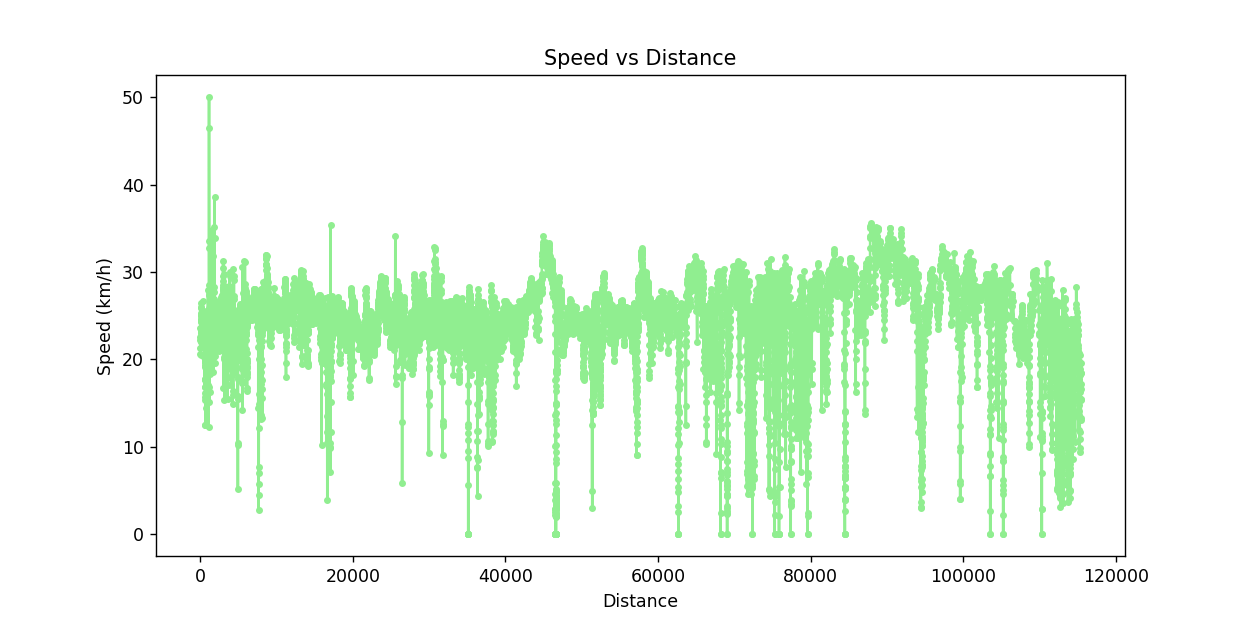

Text(0.5, 1.0, 'Speed vs Distance')

In [42]:
%matplotlib notebook
import matplotlib.pyplot as plt
# We use matplotlib to make a scatter of distance vs speed

plt.figure(figsize=(10,5))#use this to set size of figure

### Set the variables ####
x = fietsdata.distance #x-values: column distance
s = fietsdata.speed_kmh #y values: column speed

### Plot the scatter with labels and title ###
plt.plot(x,s,c='lightgreen', marker=".") #make the scatter
# scatter(x, y, s=None, c=None, marker=None, cmap=None, norm=None, vmin=None, vmax=None, alpha=None, linewidths=None, verts=<deprecated parameter>, edgecolors=None, \*, plotnonfinite=False, data=None, \*\*kwargs)
plt.xlabel('Distance')
plt.ylabel('Speed (km/h)')
plt.title('Speed vs Distance')
#plt.legend() 

### 4b. Speed, heart rate, cadence and power

<IPython.core.display.Javascript object>


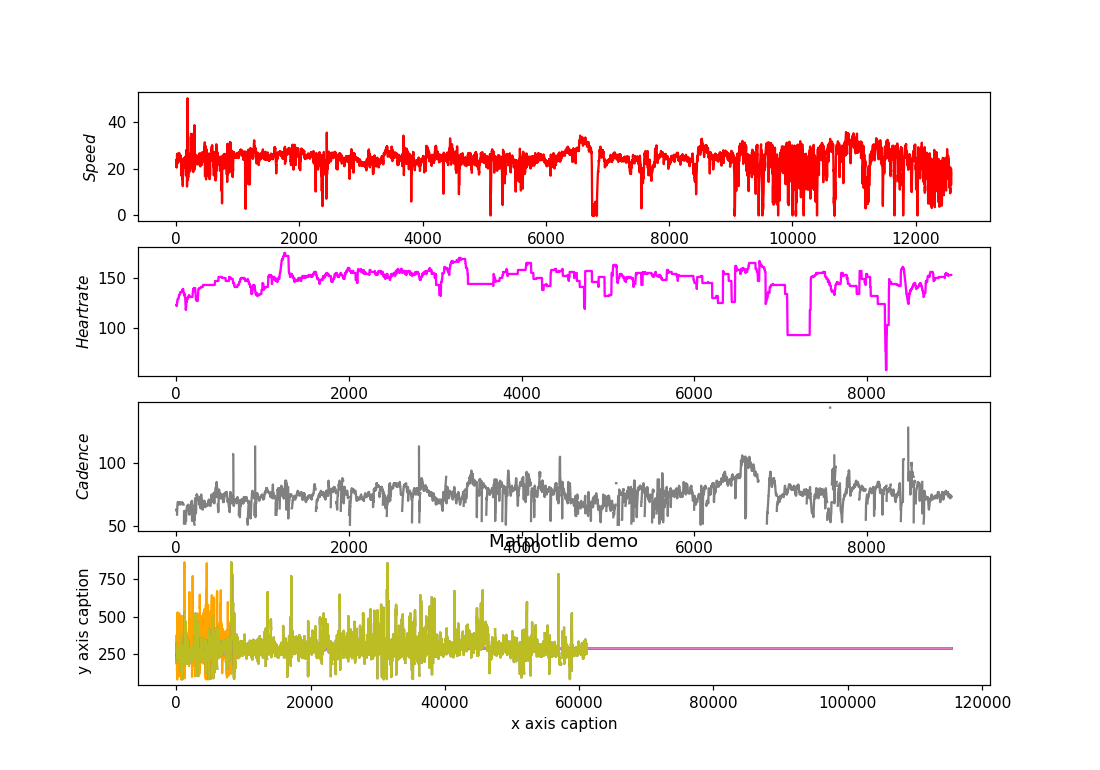

Text(0, 0.5, '$Power$')

In [88]:
%matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(10,7))#use this to set size of figure

######## write the data to a variable ###########

s = fietsdata.speed_kmh
h = fietsdata.heart_rate
c = fietsdata.cadence
p = fietsdata.power

####### make the subplots ##########
plt.subplot(4,1,1)
plt.plot(s, color='red', linewidth=1.5)
plt.ylabel(r'$Speed$') # y label

plt.subplot(4,1,2)
plt.plot(h, color='magenta', linewidth=1.5)
plt.ylabel(r'$Heartrate$') # y label

plt.subplot(4,1,3) 
plt.plot(c, color='grey', linewidth=1.5)
plt.ylabel(r'$Cadence$') # y label

plt.subplot(4,1,4)
plt.plot(p, color='orange', linewidth=1.5)
plt.ylabel(r'$Power$') # y label

### 4c. Histogram of cadence, bpm and power

<IPython.core.display.Javascript object>


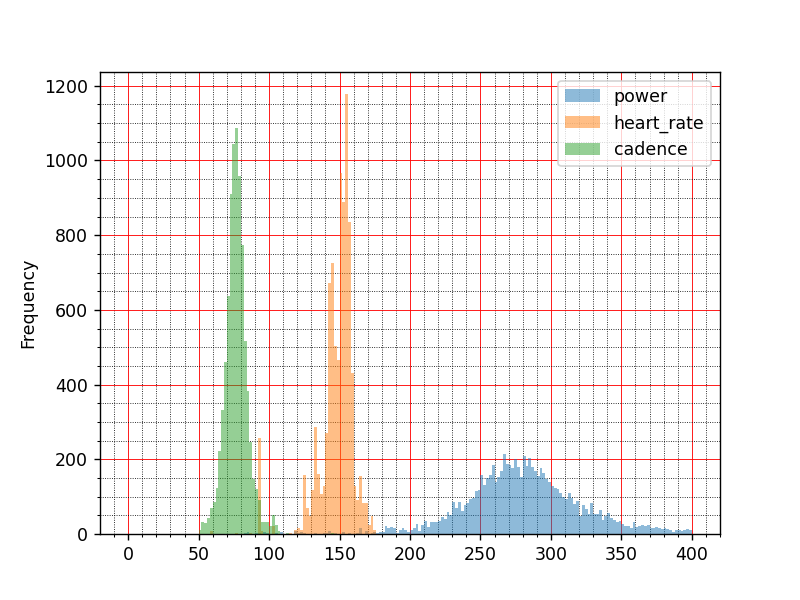

In [67]:
fig, ax = plt.subplots()
fietsdata[['power', 'heart_rate', 'cadence']].plot.hist(bins=200, alpha=0.5, range=(0, 400), ax=ax)
ax.legend()
ax.set_axisbelow(True)
ax.minorticks_on()
ax.grid(which='major', linestyle='-', linewidth='0.5', color='red')
ax.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

## 4d. Speed vs Power

<IPython.core.display.Javascript object>


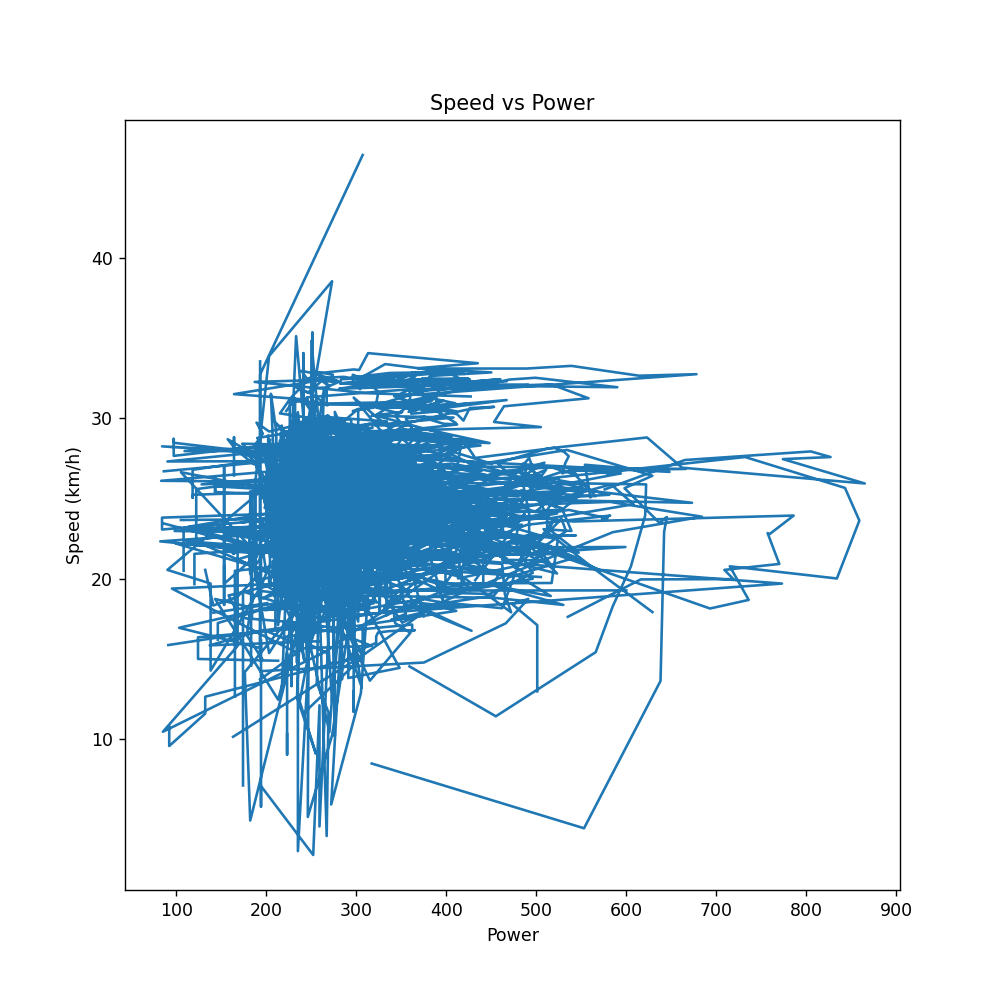

Text(0.5, 1.0, 'Speed vs Power')

In [68]:
%matplotlib notebook
import matplotlib.pyplot as plt
# We use matplotlib to make a scatter of distance vs speed

plt.figure(figsize=(8,8))#use this to set size of figure

### Set the variables ####
s = fietsdata.speed_kmh #y values: column speed
p = fietsdata.power

### Plot the scatter with labels and title ###
plt.plot(p,s) #make the scatter
plt.xlabel('Power')
plt.ylabel('Speed (km/h)')
plt.title('Speed vs Power')
#plt.legend() 

## 5. Some more data analysis

### 5a. Average values

In [70]:
avg_speed= fietsdata["speed_kmh"].mean()
text_speed = "Your average speed was {:.1f} km/h."
print(text_speed.format(avg_speed))

avg_cadence = fietsdata['cadence'].mean()
text_cad = "Your average cadence was {:.0f}."
print(text_cad.format(avg_cadence))

avg_power = fietsdata['power'].mean()
text_power = "Your average power was {:.0f} watt."
print(text_power.format(avg_power))

avg_heart_rate = fietsdata['heart_rate'].mean()
text_heart_rate = "Your average heart was {:.0f} beats/minute."
print(text_heart_rate.format(avg_heart_rate))

avg_temp = fietsdata['temperature'].mean()
text_temp = "The average temperature was {:.0f} degrees Celsius."
print(text_temp.format(avg_temp))

Your average speed was 23.7 km/h.
Your average cadence was 76.
Your average power was 290 watt.
Your average heart was 147 beats/minute.
The average temperature was 23 degrees Celsius.


In [71]:
med_speed= fietsdata["speed_kmh"].median()
text_speed = "Your median speed was {:.1f} km/h."
print(text_speed.format(med_speed))

med_cadence = fietsdata['cadence'].median()
text_cad = "Your median cadence was {:.0f}."
print(text_cad.format(med_cadence))

med_power = fietsdata['power'].median()
text_power = "Your median power was {:.0f} watt."
print(text_power.format(med_power))

med_heart_rate = fietsdata['heart_rate'].median()
text_heart_rate = "Your median heartrate was {:.0f} beats/minute."
print(text_heart_rate.format(med_heart_rate))

med_temp = fietsdata['temperature'].median()
text_temp = "The median temperature was {:.0f} degrees Celsius."
print(text_temp.format(med_temp))

Your median speed was 24.5 km/h.
Your median cadence was 76.
Your median power was 281 watt.
Your median heartrate was 150 beats/minute.
The median temperature was 22 degrees Celsius.


In [72]:
max_speed= fietsdata["speed_kmh"].max()
text_speed = "Your max speed was {:.1f} km/h."
print(text_speed.format(max_speed))

max_cadence= fietsdata["cadence"].max()
text_cadence = "Your max cadence was {:.1f}."
print(text_cadence.format(max_cadence))

max_power = fietsdata['power'].max()
text_power = "Your max power was {:.0f} watt."
print(text_power.format(max_power))

max_heart_rate = fietsdata['heart_rate'].max()
text_heart_rate = "Your max heartrate was {:.0f} beats/minute."
print(text_heart_rate.format(max_heart_rate))

max_temp = fietsdata['temperature'].max()
text_temp = "The max temperature was {:.0f} degrees Celsius."
print(text_temp.format(max_temp))

Your max speed was 50.0 km/h.
Your max cadence was 144.0.
Your max power was 865 watt.
Your max heartrate was 175 beats/minute.
The max temperature was 28 degrees Celsius.


In [73]:
import pandas as pd

# table from list
list0 = [' ', 'Speed', 'Cadence', 'Power', 'Heart rate', 'Temperature']
list1 = ["Average", avg_speed, avg_cadence, avg_power, avg_heart_rate, avg_temp]
list2 = ["Median", med_speed, med_cadence, med_power, med_heart_rate, med_temp]
list3 = ["Max", max_speed, '-', max_power, max_heart_rate, max_temp]

tabel = pd.DataFrame([list0, list1, list2, list3])

tabel.round(0) # round werkt hier niet. 

,0,1,2,3,4,5
0,,Speed,Cadence,Power,Heart rate,Temperature
1,Average,23.7049,76.1963,289.501,147.126,23.0766
2,Median,24.5196,76,281,150,22
3,Max,50.022,-,865,175,28


In [74]:
import pandas as pd

tabel2 = pd.DataFrame([ [' ', 'Speed', 'Cadence', 'Power', 'Heart rate', 'Temperature'],
                      ["Average", avg_speed, avg_cadence, avg_power, avg_heart_rate, avg_temp],
                      ["Median", med_speed, med_cadence, med_power, med_heart_rate, med_temp],
                      ["Max", max_speed, '-', max_power, max_heart_rate, max_temp],
                      ])
tabel2.round(1)

,0,1,2,3,4,5
0,,Speed,Cadence,Power,Heart rate,Temperature
1,Average,23.7049,76.1963,289.501,147.126,23.0766
2,Median,24.5196,76,281,150,22
3,Max,50.022,-,865,175,28


In [75]:
weight = 94 
power_profile = med_power / weight
print("Your power profile was "+ str(round(power_profile,2)) + ' W/kg')

Your power profile was 2.99 W/kg


### 5b. Calories burned based on power meter

In [19]:
# watt * tijd = 
# watt = 1 joule/seconde

# Som (alle powermetingen)= totaal vermogen geleverd aan fiets eenheid: joule / kilojoule
# total_energy = sum['power']

total_energy = fietsdata['power'].sum()

# convert watt to kcal = 1 kilojoule = 0.239 kilocalorie
energy_kcal = total_energy * 0.239 / 1000

# Efficiency body = 21%
energy_used = energy_kcal / 0.21
text = "You've burned {:.0f} kcal"
print(text.format(energy_used))

You've burned 2826 kcal


### 5.c Calories burned based on heartrate

In [86]:
#source: http://www.shapesense.com/fitness-exercise/calculators/heart-rate-based-calorie-burn-calculator.shtml
HR= avg_heart_rate # gemiddelde heartrate
W = 94 #gewicht
A = 44 #Age
T = 4.9
Calorie_burned_man = ((-55.0969 + (0.6309 * HR) + (0.1988 * W) + (0.2017 * A)) / 4.184) * 60 * T
text = "You've burned {:.0f} kcal"
print(text.format(Calorie_burned_man))

You've burned 4588 kcal


### 5d. Total duration

In [20]:
timetable = (fietsdata['timestamp'])
starttime= timetable.iloc[0]
endtime= timetable.iloc[-1]
#starttijd = timetable.iloc[1,0]
#print(starttijd

duration = endtime-starttime

print("Total duration was: "+ str(duration))

Total duration was: 0 days 04:54:57


## 6. Store the data in json format with date in filename

In [21]:
# Store the dataframe in a json
# source: https://datatofish.com/export-pandas-dataframe-json/
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.to_json.html

import pandas as pd
import datetime

filename = datetime.datetime.now().strftime("%Y%m%d")+"fiets.json"
fietsdata.to_json(filename) # it creates a .json file in the astroplant_explorer/learning_stuff folder

#fietsdata.to_json(r'fietsdata.json')

# result: it works but json file is about 8x larger than .fit file.

### 7. Some more data analys: rolling, expanding etc

<IPython.core.display.Javascript object>


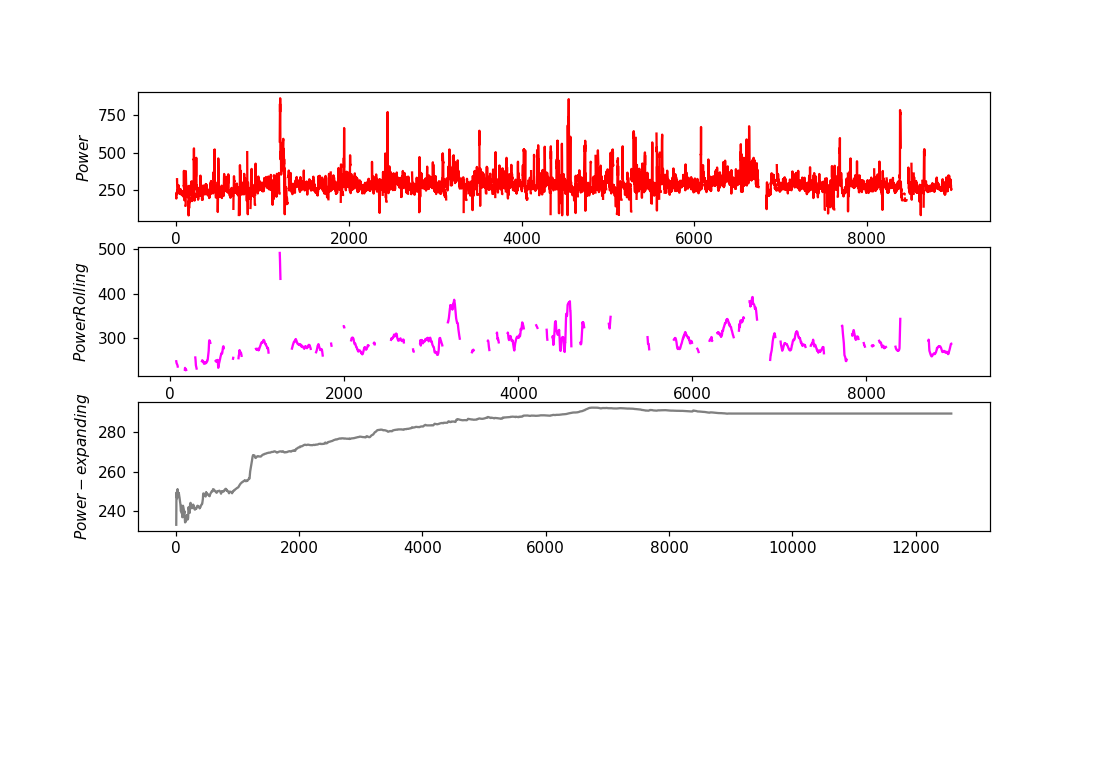

In [115]:
%matplotlib notebook
import matplotlib.pyplot as plt

plt.figure(figsize=(10,7))#use this to set size of figure

x = fietsdata.distance #x-values: column distance
p = fietsdata.power
p_roll = fietsdata.power.rolling(60).mean()
p_exp = fietsdata.power.expanding(7).mean()
#############
plt.subplot(4,1,1)
plt.plot(p, color='red', linewidth=1.5)
plt.ylabel(r'$Power$') # y label

plt.subplot(4,1,2)
plt.plot(p_roll, color='magenta', linewidth=1.5)
plt.ylabel(r'$Power Rolling$') # y label

plt.subplot(4,1,3) 
plt.plot(p_exp, color='grey', linewidth=1.5)
plt.ylabel(r'$Power - expanding$') # y label

#plt.subplot(4,1,4)
#plt.plot(p, color='orange', linewidth=1.5)
#plt.ylabel(r'$Power$') # y label

#plt.plot(x,p)
plt.show()